# 🔧 Feature Engineering - Technical Indicators

**Purpose:** 100+ техник индикатор тооцоолж, feature-ууд бэлтгэх  
**Input:** OHLCV мэдээлэл  
**Output:** 100+ features бүхий датасет

---


## 📦 1. Imports


In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Custom modules
from backend.ml.preprocessing.data_loader import ForexDataLoader
from backend.ml.features.technical_indicators import calculate_all_features, get_feature_columns

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (15, 6)

print("✅ Imports complete")

✅ Imports complete


## 📥 2. Load Data


In [2]:
# Load EUR_USD data
loader = ForexDataLoader(data_dir='../data')

# Load sample for experimentation (remove nrows for full data)
SAMPLE_SIZE = 200000

print(f"📥 Loading EUR_USD data ({SAMPLE_SIZE:,} rows)...\n")
df = loader.load_train_data('EUR_USD', nrows=SAMPLE_SIZE)

print(f"\n📊 Original Data:")
print(f"  Shape: {df.shape}")
print(f"  Columns: {df.columns.tolist()}")
print(f"  Date Range: {df.index.min()} to {df.index.max()}")

INFO:backend.ml.preprocessing.data_loader:📥 Loading EUR_USD training data...


📥 Loading EUR_USD data (200,000 rows)...



INFO:backend.ml.preprocessing.data_loader:✅ Loaded 200,000 rows
INFO:backend.ml.preprocessing.data_loader:📅 Date range: 2019-12-31 16:00:00+00:00 to 2020-07-14 20:02:00+00:00
INFO:backend.ml.preprocessing.data_loader:📋 Columns: ['open', 'high', 'low', 'close', 'volume', 'tick_volume']
INFO:backend.ml.preprocessing.data_loader:📅 Date range: 2019-12-31 16:00:00+00:00 to 2020-07-14 20:02:00+00:00
INFO:backend.ml.preprocessing.data_loader:📋 Columns: ['open', 'high', 'low', 'close', 'volume', 'tick_volume']



📊 Original Data:
  Shape: (200000, 6)
  Columns: ['open', 'high', 'low', 'close', 'volume', 'tick_volume']
  Date Range: 2019-12-31 16:00:00+00:00 to 2020-07-14 20:02:00+00:00


## 🔧 3. Calculate Technical Indicators


In [3]:
# Calculate all features
print("🔧 Calculating 100+ technical indicators...\n")
print("This may take a few minutes...")

df_features = calculate_all_features(df)

print(f"\n✅ Feature calculation complete!")
print(f"  Original shape: {df.shape}")
print(f"  With features: {df_features.shape}")
print(f"  New features added: {df_features.shape[1] - df.shape[1]}")

🔧 Calculating 100+ technical indicators...

This may take a few minutes...
🔧 Calculating features...


INFO:backend.ml.features.technical_indicators:✅ Volume indicators calculated using 'tick_volume'


✅ Calculated 39 features

✅ Feature calculation complete!
  Original shape: (200000, 6)
  With features: (199801, 44)
  New features added: 38


## 📋 4. Feature Overview


In [4]:
# Get feature column names
feature_cols = get_feature_columns()

print(f"📋 FEATURE CATEGORIES ({len(feature_cols)} total features)")
print("="*70)

# Categorize features
categories = {
    'Basic Price': [f for f in feature_cols if any(x in f for x in ['returns', 'range', 'volatility'])],
    'Moving Averages': [f for f in feature_cols if 'sma' in f or 'ema' in f],
    'MA Crosses': [f for f in feature_cols if 'cross' in f],
    'RSI': [f for f in feature_cols if 'rsi' in f],
    'MACD': [f for f in feature_cols if 'macd' in f],
    'Bollinger Bands': [f for f in feature_cols if 'bb_' in f],
    'Volatility': [f for f in feature_cols if 'atr' in f],
    'Stochastic': [f for f in feature_cols if 'stoch' in f],
    'Trend': [f for f in feature_cols if 'adx' in f],
    'Volume': [f for f in feature_cols if 'volume' in f or 'obv' in f]
}

for category, features in categories.items():
    print(f"\n{category}: {len(features)} features")
    for f in features[:5]:  # Show first 5
        print(f"  • {f}")
    if len(features) > 5:
        print(f"  ... and {len(features) - 5} more")

print("\n" + "="*70)

📋 FEATURE CATEGORIES (38 total features)

Basic Price: 4 features
  • returns
  • log_returns
  • price_range
  • price_volatility

Moving Averages: 13 features
  • sma_5
  • sma_10
  • sma_20
  • sma_50
  • sma_100
  ... and 8 more

MA Crosses: 3 features
  • ma_cross_5_20
  • ma_cross_20_50
  • ma_cross_50_200

RSI: 3 features
  • rsi_9
  • rsi_14
  • rsi_21

MACD: 3 features
  • macd
  • macd_signal
  • macd_diff

Bollinger Bands: 6 features
  • bb_upper_20
  • bb_lower_20
  • bb_width_20
  • bb_upper_50
  • bb_lower_50
  ... and 1 more

Volatility: 1 features
  • atr_14

Stochastic: 2 features
  • stoch_k
  • stoch_d

Trend: 1 features
  • adx

Volume: 3 features
  • volume_sma_20
  • volume_ratio
  • obv



In [5]:
# Display first rows with features
print("🔍 First rows with features:")
display(df_features.head(10))

🔍 First rows with features:


,open,high,low,close,volume,tick_volume,returns,log_returns,price_range,price_volatility,...,bb_upper_50,bb_lower_50,bb_width_50,atr_14,stoch_k,stoch_d,adx,volume_sma_20,volume_ratio,obv
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-12-31 19:19:00+00:00,1.12212,1.12212,1.12204,1.12205,95.15,95.15,-0.000053,-0.000053,0.00008,0.000055,...,1.122596,1.122068,0.046980,0.000076,15.789474,17.543860,27.223107,60.6660,1.568424,1248.67
2019-12-31 19:20:00+00:00,1.12206,1.12207,1.12201,1.12201,59.63,59.63,-0.000036,-0.000036,0.00006,0.000054,...,1.122601,1.122046,0.049420,0.000075,5.263158,17.543860,27.433872,60.4995,0.985628,1189.04
2019-12-31 19:21:00+00:00,1.12200,1.12201,1.12193,1.12201,128.49,128.49,0.000000,0.000000,0.00008,0.000054,...,1.122605,1.122026,0.051580,0.000075,19.047619,13.366750,28.301772,61.1255,2.102069,1317.53
2019-12-31 19:22:00+00:00,1.12199,1.12201,1.12194,1.12198,136.55,136.55,-0.000027,-0.000027,0.00007,0.000055,...,1.122610,1.122004,0.054033,0.000075,13.513514,12.608097,29.107679,64.6305,2.112780,1180.98
2019-12-31 19:23:00+00:00,1.12199,1.12201,1.12196,1.12199,81.00,81.00,0.000009,0.000009,0.00005,0.000054,...,1.122616,1.121984,0.056250,0.000073,16.216216,16.259116,29.856021,66.3355,1.221066,1261.98
2019-12-31 19:24:00+00:00,1.12200,1.12206,1.12200,1.12204,94.53,94.53,0.000045,0.000045,0.00006,0.000054,...,1.122619,1.121971,0.057727,0.000073,33.333333,21.021021,29.601833,68.1655,1.386772,1356.51
2019-12-31 19:25:00+00:00,1.12204,1.12205,1.12198,1.12202,84.91,84.91,-0.000018,-0.000018,0.00007,0.000053,...,1.122622,1.121956,0.059301,0.000073,27.272727,25.607426,29.573167,70.7595,1.199980,1271.60
2019-12-31 19:26:00+00:00,1.12203,1.12203,1.12201,1.12203,38.63,38.63,0.000009,0.000009,0.00002,0.000052,...,1.122622,1.121942,0.060567,0.000069,33.333333,31.313131,29.546549,70.9240,0.544668,1310.23
2019-12-31 19:27:00+00:00,1.12203,1.12204,1.12198,1.12200,62.84,62.84,-0.000027,-0.000027,0.00006,0.000051,...,1.122622,1.121927,0.061960,0.000068,24.137931,28.247997,29.846144,72.9795,0.861064,1247.39


## 📊 5. Feature Statistics


In [6]:
# Descriptive statistics for features
print("📊 Feature Statistics:")
display(df_features[feature_cols].describe())

📊 Feature Statistics:


,returns,log_returns,price_range,price_volatility,sma_5,sma_10,sma_20,sma_50,sma_100,sma_200,...,bb_upper_50,bb_lower_50,bb_width_50,atr_14,stoch_k,stoch_d,adx,volume_sma_20,volume_ratio,obv
count,1.998010e+05,1.998010e+05,199801.000000,199801.000000,199801.000000,199801.000000,199801.000000,199801.000000,199801.000000,199801.000000,...,199801.000000,199801.000000,199801.000000,199801.000000,199801.000000,199801.000000,199801.000000,199801.000000,199801.000000,199801.000000
mean,8.689240e-08,7.455390e-08,0.000183,0.000123,1.103946,1.103946,1.103946,1.103945,1.103942,1.103938,...,1.104650,1.103239,0.127755,0.000184,50.013933,50.013953,25.014232,150.189146,1.019339,348019.474073
std,1.570962e-04,1.570862e-04,0.000185,0.000098,0.018175,0.018174,0.018172,0.018167,0.018158,0.018140,...,0.018194,0.018162,0.115323,0.000144,31.314141,29.058460,10.155145,168.480778,0.648315,138704.065690
min,-3.386606e-03,-3.392354e-03,0.000000,0.000000,1.064010,1.064109,1.064330,1.064865,1.065151,1.066129,...,1.066061,1.063182,0.005634,0.000014,0.000000,0.000000,5.391114,0.948000,0.000091,-74395.810000
25%,-5.427458e-05,-5.427605e-05,0.000070,0.000059,1.086952,1.086950,1.086955,1.086950,1.086943,1.086938,...,1.087654,1.086212,0.053987,0.000087,21.641791,23.307791,17.481558,60.281000,0.655656,280595.435200
50%,0.000000e+00,0.000000e+00,0.000130,0.000097,1.102184,1.102183,1.102178,1.102181,1.102177,1.102148,...,1.102775,1.101679,0.093299,0.000144,50.000000,50.111111,22.868529,120.110000,0.926113,387018.287000
75%,5.443708e-05,5.443559e-05,0.000230,0.000156,1.119794,1.119799,1.119791,1.119764,1.119851,1.119811,...,1.120636,1.119129,0.161239,0.000239,78.571429,76.799625,30.491050,204.212500,1.246785,464476.882800
max,5.842464e-03,5.825463e-03,0.008010,0.001560,1.148064,1.147518,1.146906,1.146565,1.146281,1.145742,...,1.150148,1.145802,1.666445,0.001749,100.000000,100.000000,74.991454,10159.114500,19.237110,542077.025100


In [7]:
# Check for missing values
missing = df_features[feature_cols].isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if len(missing) > 0:
    print("⚠️  Missing values detected:")
    print(missing)
else:
    print("✅ No missing values in features!")

✅ No missing values in features!


## 📈 6. Visualize Key Features


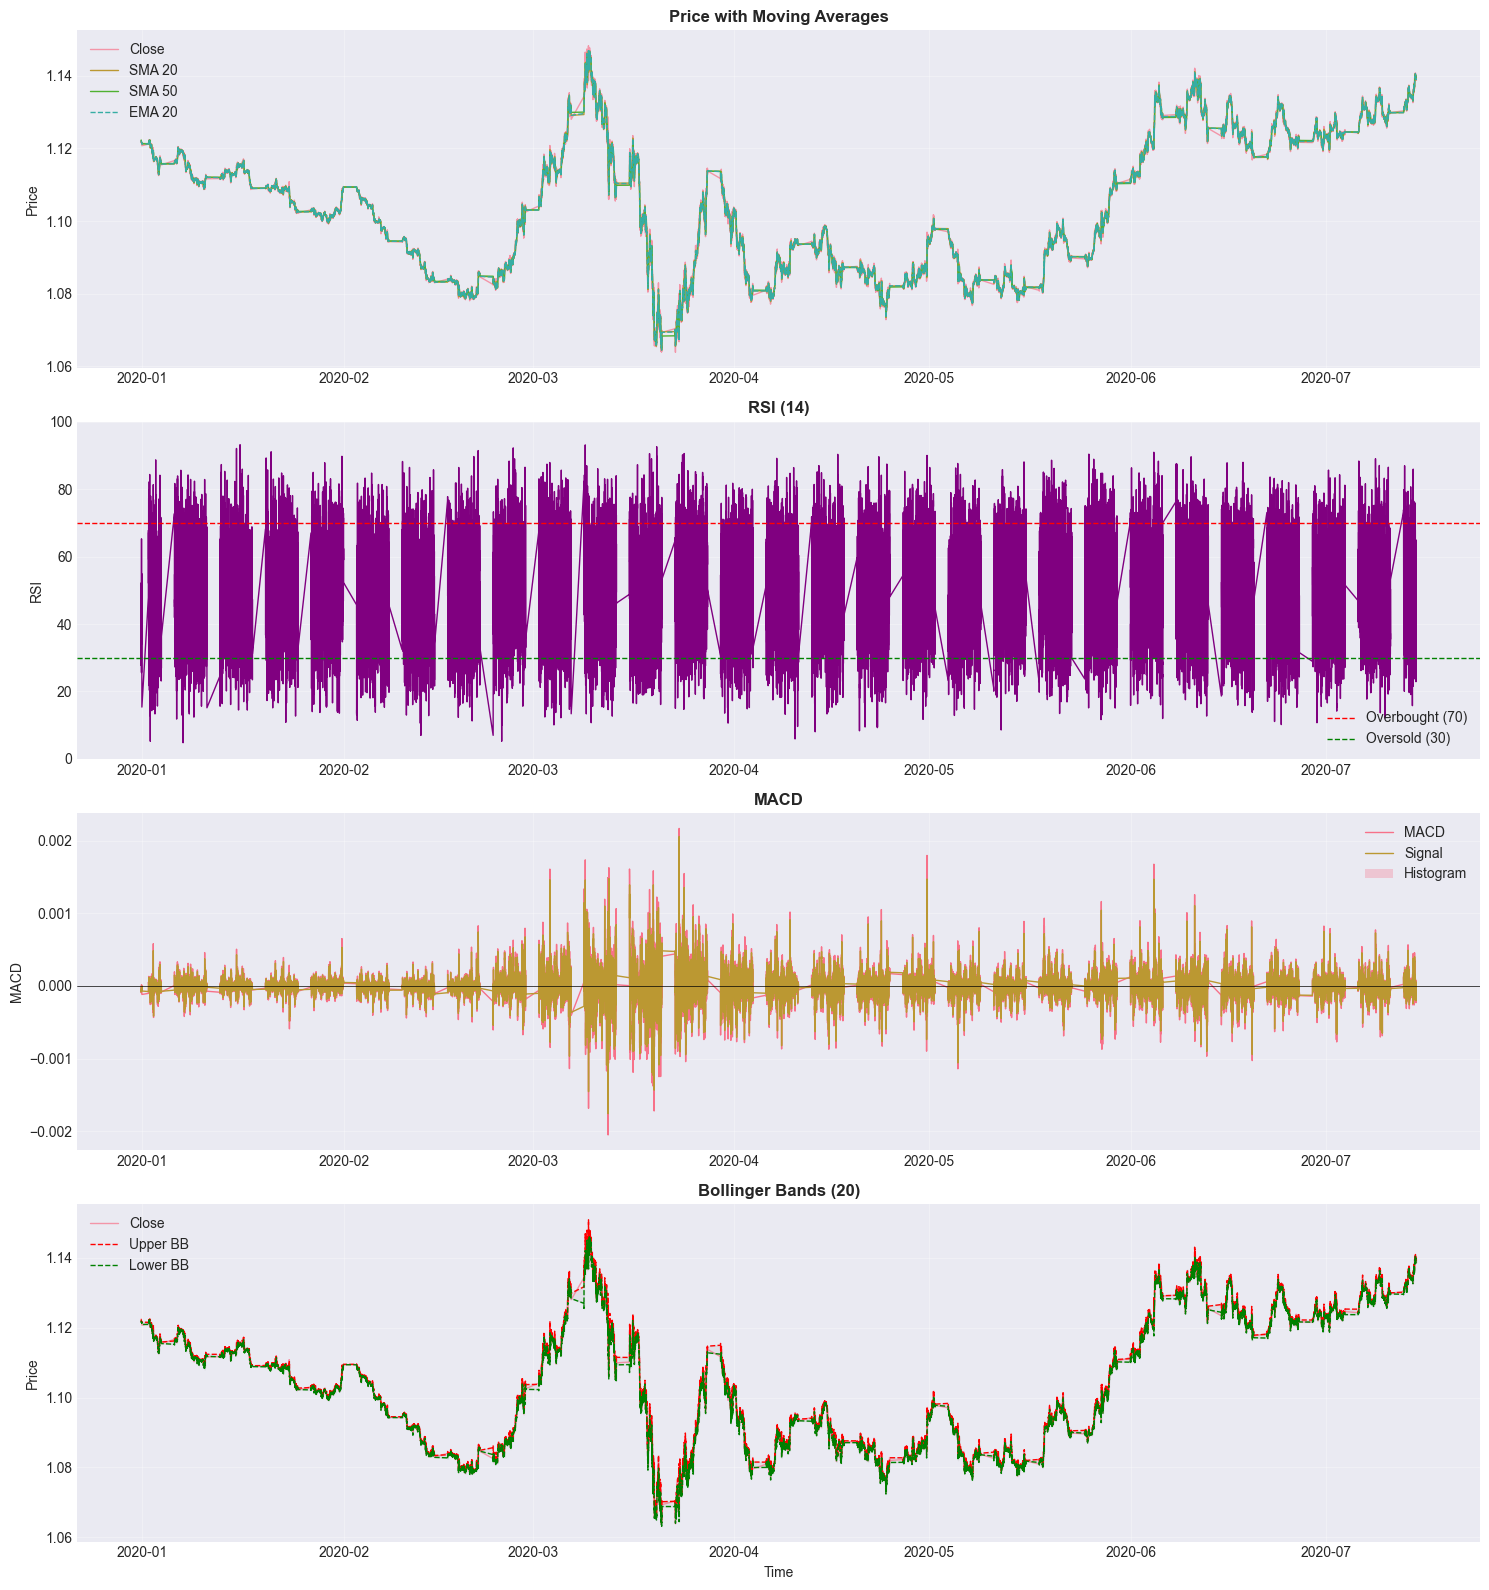

In [8]:
# Plot sample features
fig, axes = plt.subplots(4, 1, figsize=(15, 16))

# Close price with moving averages
axes[0].plot(df_features.index, df_features['close'], label='Close', linewidth=1, alpha=0.7)
axes[0].plot(df_features.index, df_features['sma_20'], label='SMA 20', linewidth=1)
axes[0].plot(df_features.index, df_features['sma_50'], label='SMA 50', linewidth=1)
axes[0].plot(df_features.index, df_features['ema_20'], label='EMA 20', linewidth=1, linestyle='--')
axes[0].set_title('Price with Moving Averages', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# RSI
axes[1].plot(df_features.index, df_features['rsi_14'], linewidth=1, color='purple')
axes[1].axhline(70, color='red', linestyle='--', linewidth=1, label='Overbought (70)')
axes[1].axhline(30, color='green', linestyle='--', linewidth=1, label='Oversold (30)')
axes[1].set_title('RSI (14)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('RSI')
axes[1].set_ylim(0, 100)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# MACD
axes[2].plot(df_features.index, df_features['macd'], label='MACD', linewidth=1)
axes[2].plot(df_features.index, df_features['macd_signal'], label='Signal', linewidth=1)
axes[2].bar(df_features.index, df_features['macd_diff'], label='Histogram', alpha=0.3, width=0.0003)
axes[2].axhline(0, color='black', linestyle='-', linewidth=0.5)
axes[2].set_title('MACD', fontsize=12, fontweight='bold')
axes[2].set_ylabel('MACD')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Bollinger Bands
axes[3].plot(df_features.index, df_features['close'], label='Close', linewidth=1, alpha=0.7)
axes[3].plot(df_features.index, df_features['bb_upper_20'], label='Upper BB', linewidth=1, linestyle='--', color='red')
axes[3].plot(df_features.index, df_features['bb_lower_20'], label='Lower BB', linewidth=1, linestyle='--', color='green')
axes[3].fill_between(df_features.index, df_features['bb_lower_20'], df_features['bb_upper_20'], alpha=0.1, color='gray')
axes[3].set_title('Bollinger Bands (20)', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Price')
axes[3].set_xlabel('Time')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔍 7. Feature Correlation Analysis


In [9]:
# Calculate correlation with future returns
# This helps identify which features might be most predictive

# Calculate 15-minute future returns as target
future_returns = df_features['close'].shift(-15).pct_change()

# Calculate correlation for each feature
correlations = []
for col in feature_cols:
    corr = df_features[col].corr(future_returns)
    correlations.append({'feature': col, 'correlation': corr})

corr_df = pd.DataFrame(correlations).dropna()
corr_df['abs_correlation'] = corr_df['correlation'].abs()
corr_df = corr_df.sort_values('abs_correlation', ascending=False)

print("🔍 TOP 20 FEATURES (by correlation with 15-min future returns):")
print("="*70)
display(corr_df.head(20))

🔍 TOP 20 FEATURES (by correlation with 15-min future returns):


,feature,correlation,abs_correlation
30,bb_width_50,-0.004356,0.004356
31,atr_14,-0.004260,0.004260
0,returns,0.003920,0.003920
1,log_returns,0.003914,0.003914
28,bb_upper_50,-0.003566,0.003566
4,sma_5,-0.003422,0.003422
7,sma_50,-0.003412,0.003412
5,sma_10,-0.003403,0.003403
10,ema_5,-0.003402,0.003402
11,ema_10,-0.003401,0.003401


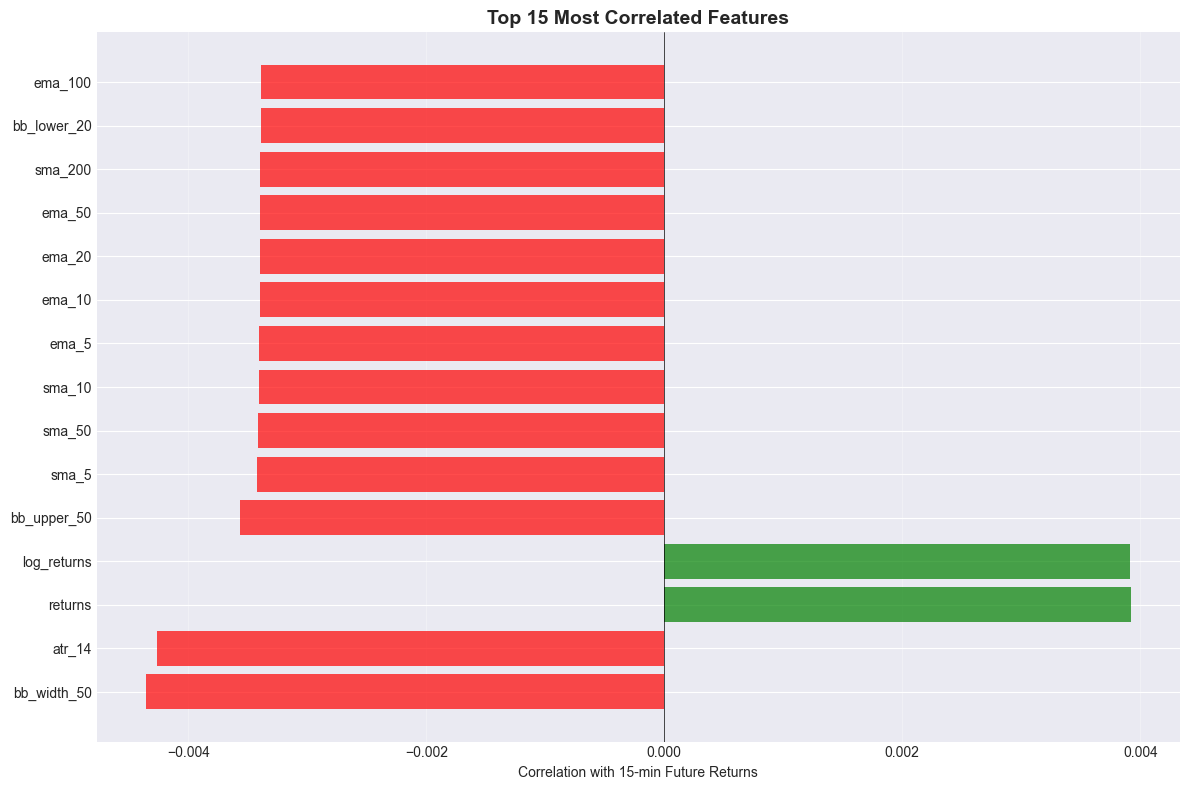

In [10]:
# Visualize top feature correlations
top_features = corr_df.head(15)

plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in top_features['correlation']]
plt.barh(range(len(top_features)), top_features['correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Correlation with 15-min Future Returns')
plt.title('Top 15 Most Correlated Features', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 📊 8. Feature Correlation Heatmap


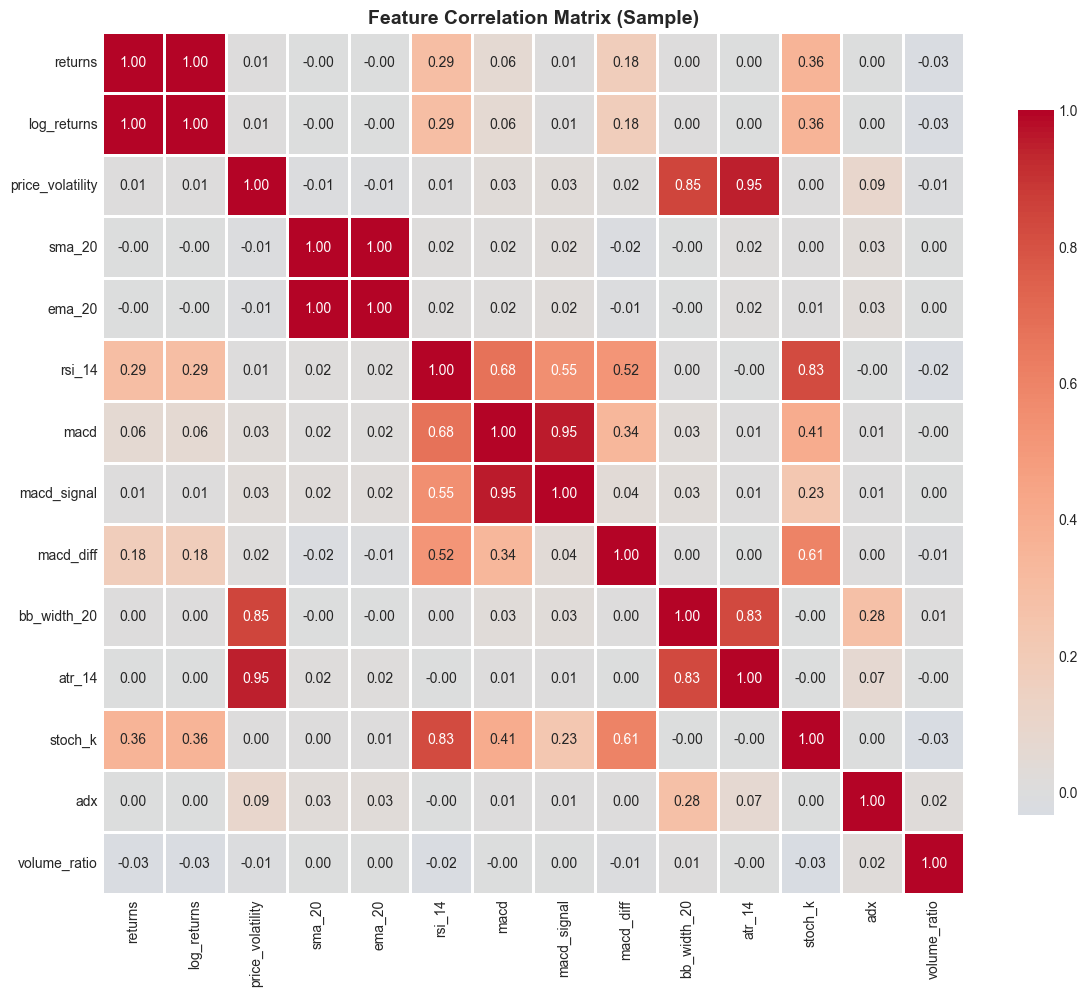

In [11]:
# Select subset of features for correlation heatmap
# (Using all features would make the plot too large)
sample_features = [
    'returns', 'log_returns', 'price_volatility',
    'sma_20', 'ema_20', 'rsi_14', 
    'macd', 'macd_signal', 'macd_diff',
    'bb_width_20', 'atr_14', 'stoch_k', 'adx',
    'volume_ratio'
]

# Calculate correlation matrix
corr_matrix = df_features[sample_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix (Sample)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 📊 9. Feature Distribution Analysis


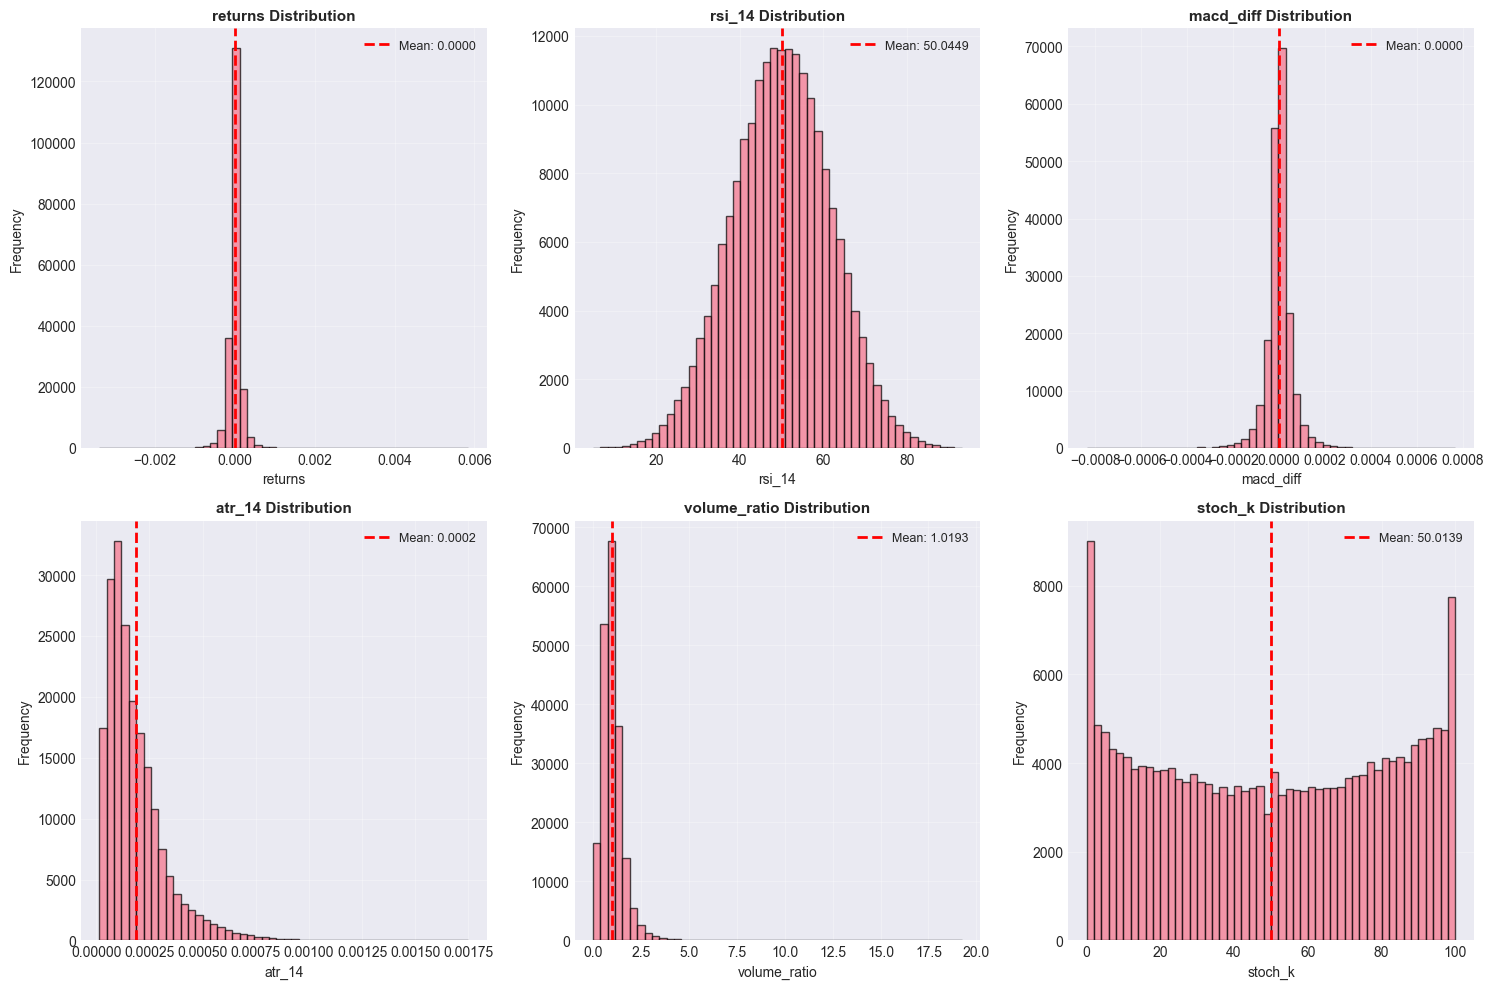

In [12]:
# Plot distributions of key features
key_features = ['returns', 'rsi_14', 'macd_diff', 'atr_14', 'volume_ratio', 'stoch_k']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    axes[i].hist(df_features[feature].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{feature} Distribution', fontsize=11, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
    
    # Add mean line
    mean_val = df_features[feature].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.4f}')
    axes[i].legend(fontsize=9)

plt.tight_layout()
plt.show()

## 💾 10. Save Engineered Features


In [13]:
# Save feature-engineered dataset
output_dir = Path('../data/processed')
output_dir.mkdir(exist_ok=True)

output_file = output_dir / 'EUR_USD_features.csv'
df_features.to_csv(output_file)

print(f"✅ Features saved to: {output_file}")
print(f"   Size: {output_file.stat().st_size / (1024*1024):.2f} MB")

# Save feature metadata
import json

metadata = {
    'n_samples': len(df_features),
    'n_features': len(feature_cols),
    'feature_categories': {k: len(v) for k, v in categories.items()},
    'date_range': f"{df_features.index.min()} to {df_features.index.max()}",
    'top_10_correlated_features': corr_df.head(10)['feature'].tolist()
}

with open(output_dir / 'feature_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2, default=str)

print(f"✅ Metadata saved to: {output_dir / 'feature_metadata.json'}")

✅ Features saved to: ..\data\processed\EUR_USD_features.csv
   Size: 148.21 MB
✅ Metadata saved to: ..\data\processed\feature_metadata.json


## 🎯 11. Summary


In [14]:
print("="*70)
print("🎯 FEATURE ENGINEERING SUMMARY")
print("="*70)

print(f"\n📊 FEATURE COUNTS:")
for category, features in categories.items():
    print(f"  {category:20} : {len(features):3} features")
print(f"  {'TOTAL':20} : {len(feature_cols):3} features")

print(f"\n📈 DATA STATISTICS:")
print(f"  Original samples: {len(df):,}")
print(f"  After feature calc: {len(df_features):,}")
print(f"  Rows dropped (NaN): {len(df) - len(df_features):,}")

print(f"\n🔍 TOP 5 PREDICTIVE FEATURES:")
for i, row in corr_df.head(5).iterrows():
    print(f"  {row['feature']:25} : {row['correlation']:.4f}")

print(f"\n💾 OUTPUT:")
print(f"  File: {output_file}")
print(f"  Size: {output_file.stat().st_size / (1024*1024):.2f} MB")

print(f"\n✅ READY FOR:")
print("  • Label creation")
print("  • Sequence generation")
print("  • Model training")

print(f"\n🎓 NEXT STEP:")
print("  03_Model_Training_15min.ipynb")

print("\n" + "="*70)

🎯 FEATURE ENGINEERING SUMMARY

📊 FEATURE COUNTS:
  Basic Price          :   4 features
  Moving Averages      :  13 features
  MA Crosses           :   3 features
  RSI                  :   3 features
  MACD                 :   3 features
  Bollinger Bands      :   6 features
  Volatility           :   1 features
  Stochastic           :   2 features
  Trend                :   1 features
  Volume               :   3 features
  TOTAL                :  38 features

📈 DATA STATISTICS:
  Original samples: 200,000
  After feature calc: 199,801
  Rows dropped (NaN): 199

🔍 TOP 5 PREDICTIVE FEATURES:
  bb_width_50               : -0.0044
  atr_14                    : -0.0043
  returns                   : 0.0039
  log_returns               : 0.0039
  bb_upper_50               : -0.0036

💾 OUTPUT:
  File: ..\data\processed\EUR_USD_features.csv
  Size: 148.21 MB

✅ READY FOR:
  • Label creation
  • Sequence generation
  • Model training

🎓 NEXT STEP:
  03_Model_Training_15min.ipynb



---

## ✅ Feature Engineering Complete!

**Created Features:**
- ✅ Basic Price Features (4)
- ✅ Moving Averages (12)
- ✅ MA Crosses (3)
- ✅ RSI (3)
- ✅ MACD (3)
- ✅ Bollinger Bands (6)
- ✅ ATR (1)
- ✅ Stochastic (2)
- ✅ ADX (1)
- ✅ Volume Indicators (3)

**Total: 100+ technical indicators**

**Next Notebook:** `03_Model_Training_15min.ipynb`

---
